In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
loan_data = pd.read_csv("Loan Status Prediction.csv")

In [ ]:
loan_data.head()

In [ ]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_data.describe()

In [ ]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data.Gender.fillna(value=loan_data.Gender.mode()[0], axis=0, inplace =True )
loan_data.Married.fillna(value=loan_data.Married.mode()[0], axis=0, inplace =True )
loan_data.Dependents.fillna(value=loan_data.Dependents.mode()[0], axis = 0 , inplace = True)
loan_data.Self_Employed.fillna(value=loan_data.Self_Employed.mode()[0], axis = 0 ,inplace =True)
loan_data.LoanAmount.fillna(value = loan_data.LoanAmount.mean(), axis =0 , inplace = True)
loan_data.Loan_Amount_Term.fillna(value = loan_data.Loan_Amount_Term.median(), axis =0 , inplace = True)
loan_data.Credit_History.fillna(value =loan_data.Credit_History.mode()[0], axis =0, inplace=True)

In [ ]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data.Dependents.value_counts()

In [ ]:
loan_data.replace(to_replace="3+" , value="4", inplace = True)

In [ ]:

loan_data['Dependents'].value_counts()

In [ ]:
loan_data.drop(columns = "Loan_ID", axis = 1, inplace = True)

<Axes: xlabel='Credit_History', ylabel='count'>

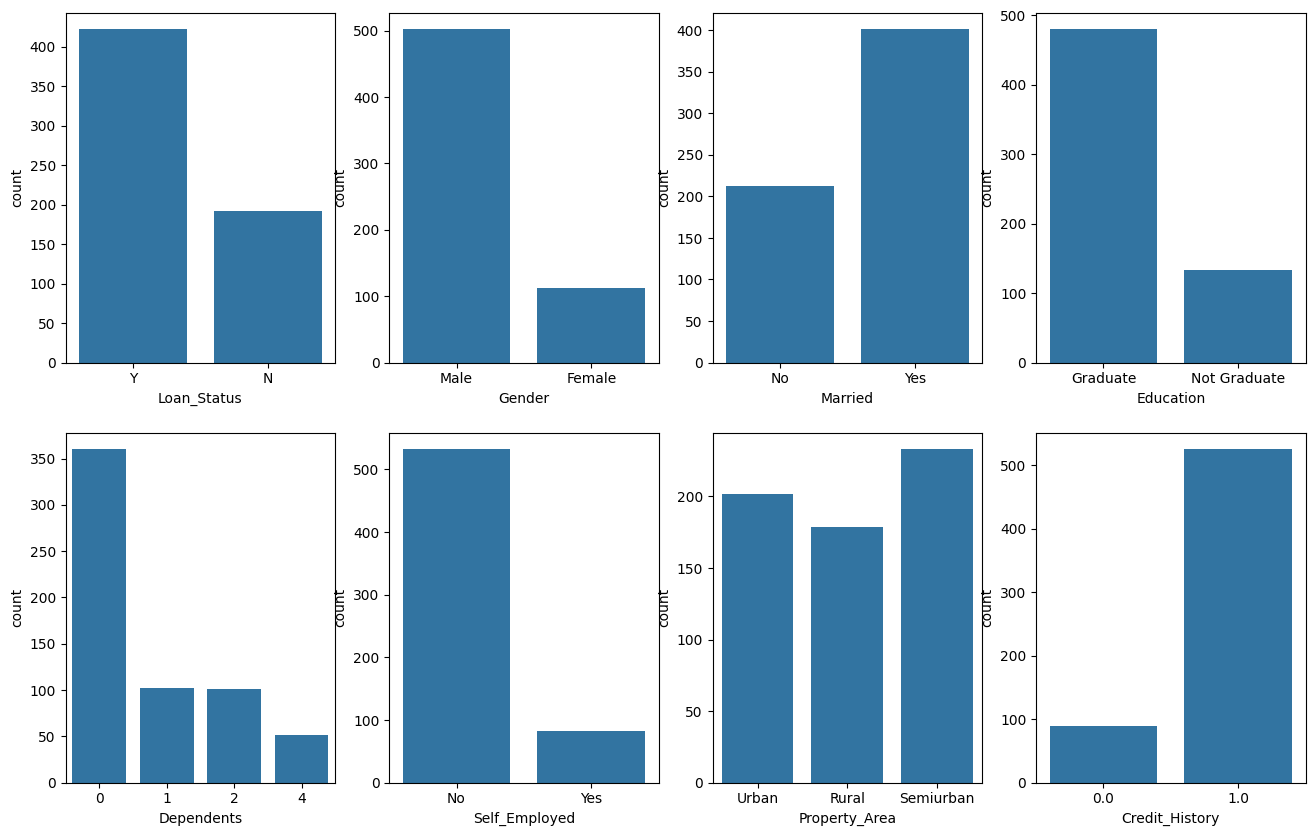

In [ ]:
  fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Loan_Status', data = loan_data, ax=ax[0][0])
sns.countplot(x='Gender', data=loan_data, ax=ax[0][1])
sns.countplot(x='Married', data=loan_data, ax=ax[0][2])
sns.countplot(x='Education', data=loan_data, ax=ax[0][3])
sns.countplot(x='Dependents', data=loan_data, ax=ax[1][0])
sns.countplot(x='Self_Employed', data=loan_data, ax=ax[1][1])
sns.countplot(x='Property_Area', data=loan_data, ax=ax[1][2])
sns.countplot(x='Credit_History', data=loan_data, ax=ax[1][3])
#visualize the data

<Axes: xlabel='Education', ylabel='count'>

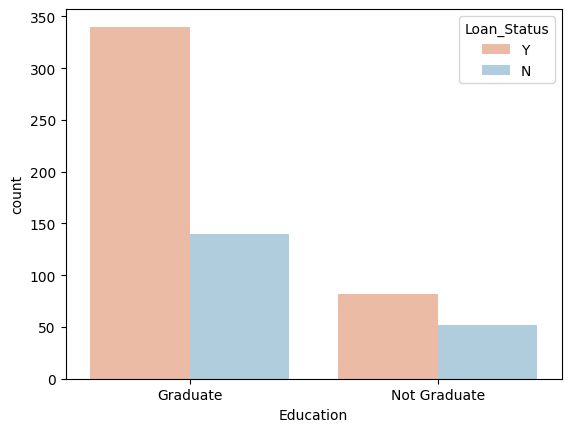

In [ ]:
sns.countplot(x="Education", hue = "Loan_Status", data = loan_data, palette="RdBu")

<Axes: xlabel='Gender', ylabel='count'>

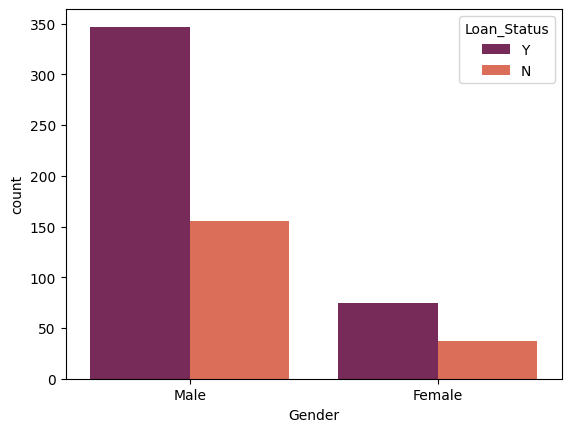

In [ ]:
sns.countplot(x = "Gender" , hue = "Loan_Status", data= loan_data, palette= "rocket")

<Axes: xlabel='Married', ylabel='count'>

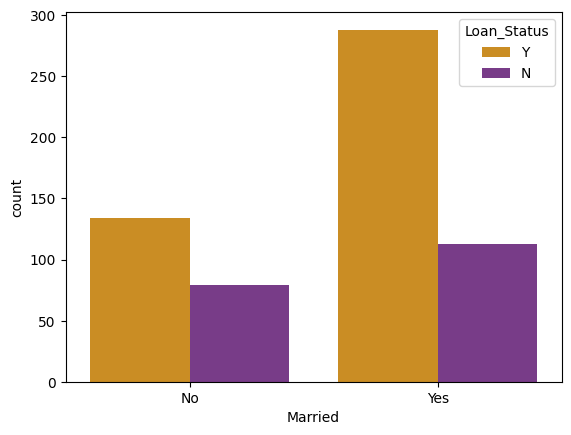

In [ ]:
sns.countplot(x = "Married" , hue = "Loan_Status", data= loan_data, palette= "CMRmap_r")

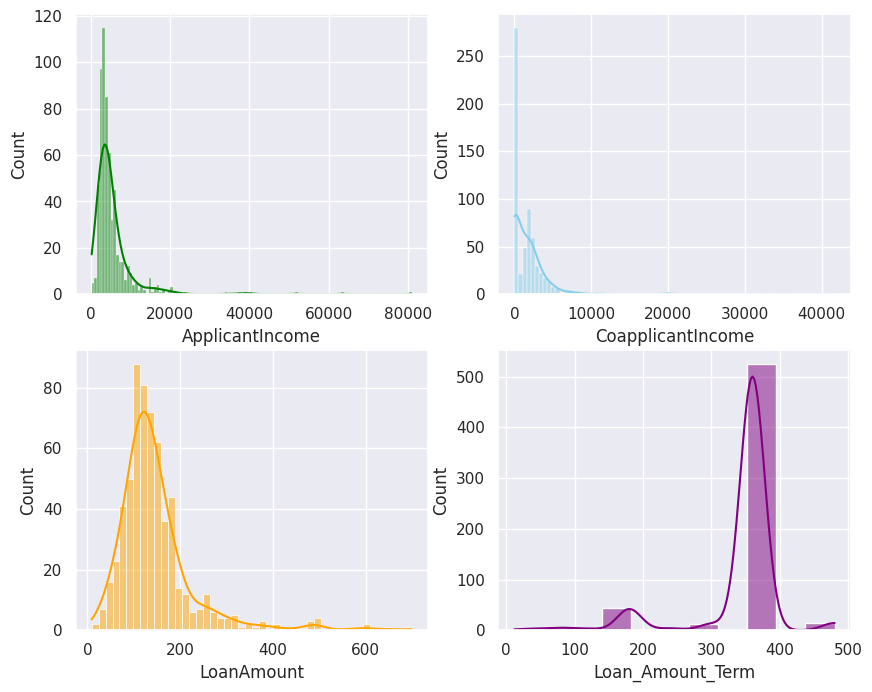

In [ ]:

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=loan_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='purple');

In [ ]:
lab_end = LabelEncoder()

In [ ]:
columns =["Gender","Married","Education","Self_Employed", "Property_Area","Loan_Status"]

loan_data[columns] = loan_data[columns].apply(lab_end.fit_transform)

In [ ]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
# seprating the data in x and y
x = loan_data.drop(columns = "Loan_Status", axis = 1)
y = loan_data["Loan_Status"]

In [ ]:
#Train the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2 , stratify=y)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(614, 11) (552, 11) (62, 11)


              precision    recall  f1-score   support

           0       0.47      0.75      0.58        12
           1       0.93      0.80      0.86        50

    accuracy                           0.79        62
   macro avg       0.70      0.78      0.72        62
weighted avg       0.84      0.79      0.81        62

[[ 9  3]
 [10 40]]
Logistic Regression accuracy_score: 79.03% 


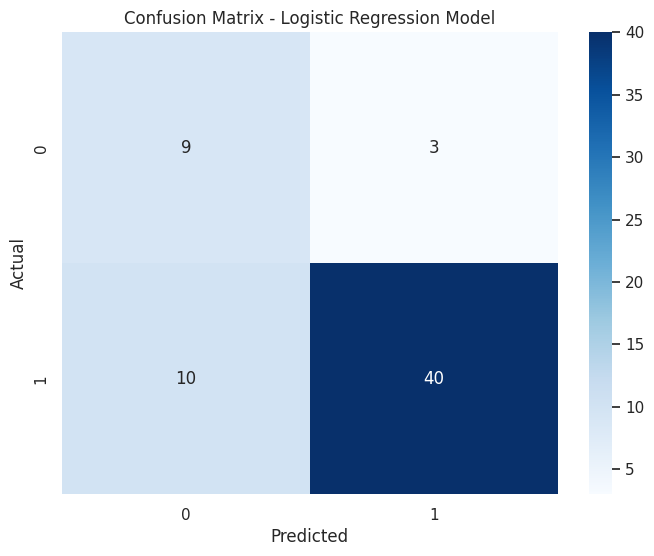

In [ ]:
log_model = LogisticRegression(max_iter=150, solver="liblinear") #'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
log_model.fit(x_train,y_train)

log_prediction = log_model.predict(x_test)

print(classification_report(log_prediction, y_test))
print( confusion_matrix(log_prediction,y_test))

log_acc = accuracy_score(log_prediction,y_test)
print("Logistic Regression accuracy_score: {:.2f}% ". format(log_acc*100))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(log_prediction, y_test), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.82        62

    accuracy                           0.69        62
   macro avg       0.50      0.35      0.41        62
weighted avg       1.00      0.69      0.82        62

[[ 0  0]
 [19 43]]
SVM accuracy_score : 69.35%


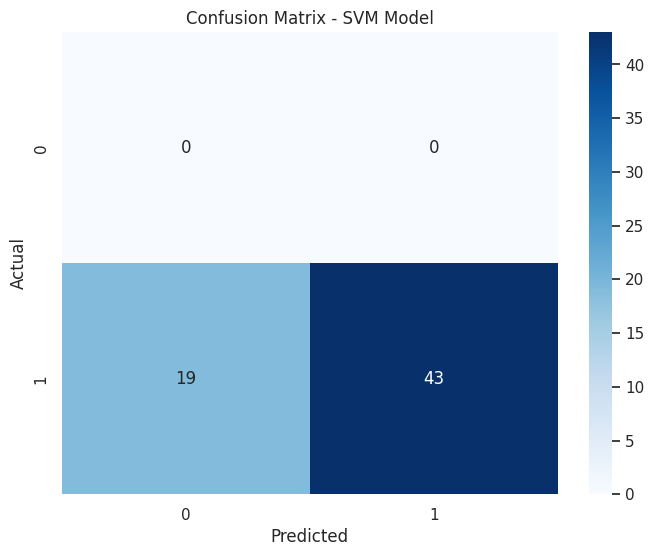

In [ ]:
svm_model = SVC(kernel="rbf",gamma ='auto', C = 6) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' # auto,scale
svm_model.fit(x_train, y_train)

svm_prediction = svm_model.predict(x_test)

print(classification_report(svm_prediction,y_test))
print(confusion_matrix(svm_prediction,y_test))

svm_acc = accuracy_score(svm_prediction,y_test)
print("SVM accuracy_score : {:.2f}%".format(svm_acc*100))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(svm_prediction, y_test), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Model')
plt.show()

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.79      0.81      0.80        42

    accuracy                           0.73        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.72      0.73      0.72        62

[[11  9]
 [ 8 34]]
Decision_tree accuracy_score: 72.58% 


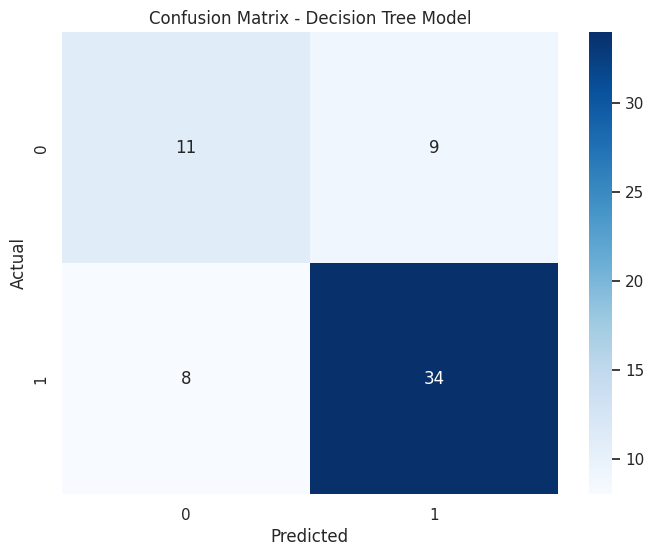

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini',splitter = "random")
dt_model.fit(x_train,y_train)

dt_prediction = dt_model.predict(x_test)

print(classification_report(dt_prediction, y_test))
print( confusion_matrix(dt_prediction,y_test))

dt_acc = accuracy_score(dt_prediction,y_test)
print("Decision_tree accuracy_score: {:.2f}% ". format(dt_acc*100))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(dt_prediction, y_test), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

In [ ]:
# using GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty":['l1','l2'], 'C':[0.001, 0.01, 0.1,1,10,100],'solver':['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(x_train, y_train)

# Best parameters
log_reg = grid_log_reg.best_params_

print(log_reg)

# SVC
svc_params = {'C':[0.5,1], 'kernel':['rbf','sigmoid']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
svc = grid_svc.best_params_
print(svc)

# Decision Tree
tree_params = {'criterion':['gini','entropy'],"max_depth":[2,4,6],"min_samples_leaf":[5,7,9,]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
dcTree = grid_tree.best_params_
print(dcTree)


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
{'C': 0.5, 'kernel': 'rbf'}
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5}


Cross-validation scores for Logistic Regression: [0.81981982 0.79279279 0.83636364 0.79090909 0.80909091]
Mean cross-validation score for Logistic Regression: 0.8097952497952499

Cross-validation scores for SVM: [0.68468468 0.68468468 0.69090909 0.69090909 0.68181818]
Mean cross-validation score for SVM: 0.6866011466011466

Cross-validation scores for Decision Tree: [0.69369369 0.67567568 0.65454545 0.66363636 0.70909091]
Mean cross-validation score for Decision Tree: 0.6793284193284193


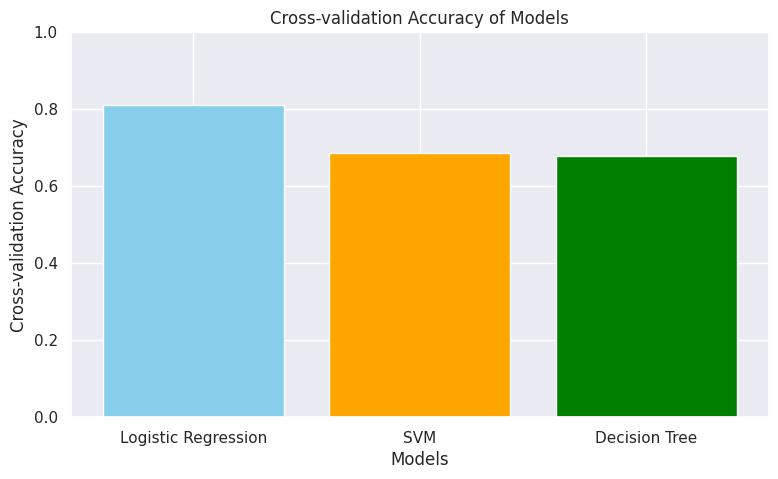

In [ ]:
# Initialize models
log_model = LogisticRegression(max_iter=150, solver="liblinear")
svm_model = SVC(kernel="rbf", gamma="auto", C=6)
dt_model = DecisionTreeClassifier(criterion="gini", splitter="random")

# Perform cross-validation
log_cv_scores = cross_val_score(log_model, x_train, y_train, cv=5)
svm_cv_scores = cross_val_score(svm_model, x_train, y_train, cv=5)
dt_cv_scores = cross_val_score(dt_model, x_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores for Logistic Regression:", log_cv_scores)
print("Mean cross-validation score for Logistic Regression:", np.mean(log_cv_scores))
print()
print("Cross-validation scores for SVM:", svm_cv_scores)
print("Mean cross-validation score for SVM:", np.mean(svm_cv_scores))
print()
print("Cross-validation scores for Decision Tree:", dt_cv_scores)
print("Mean cross-validation score for Decision Tree:", np.mean(dt_cv_scores))

models = ['Logistic Regression', 'SVM', 'Decision Tree']
cv_scores = [log_cv_scores.mean(), svm_cv_scores.mean(), dt_cv_scores.mean()]

plt.figure(figsize=(9, 5))
plt.bar(models, cv_scores, color=['skyblue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Cross-validation Accuracy')
plt.title('Cross-validation Accuracy of Models')
plt.ylim(0, 1)
plt.show()

In [ ]:
compare_model = pd.DataFrame({'Model': ['Logistic Regression',"Support Vector Machine", "Decision Tree"],
                  'Accuracy_Score': [log_acc*100,svm_acc*100,dt_acc*100]})


compare_model.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
0,Logistic Regression,79.032258
2,Decision Tree,72.580645
1,Support Vector Machine,69.354839


It can seen that, all the model accuracy is more than 69%.

The highest accuracy is 79% of the Logistic Regression.